In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=0.2, random_state=97)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=97, train_size=0.9)
print(X)
print(y)

[[ 6.8154703   9.29984979]
 [ 9.31967393  8.83834162]
 [ 6.63721279  9.2092752 ]
 [-0.67157179 -4.59977267]
 [ 6.8627509   9.31860677]
 [ 9.45572022  8.8021876 ]
 [ 9.75789826  8.73297112]
 [ 9.28815595  8.63040456]
 [ 9.63061054  8.58201482]
 [ 5.46023427 -4.0019256 ]
 [ 6.51183366  9.29733843]
 [ 5.39666517 -4.19487087]
 [ 9.38509715  8.72797479]
 [-0.89197384 -4.2668534 ]
 [ 9.6362728   8.65904583]
 [ 9.53397253  8.6716368 ]
 [-1.34941564 -4.10629343]
 [ 9.31557098  8.56640609]
 [ 6.74616305  9.53460503]
 [ 5.36342629 -4.25852287]
 [ 5.77728374 -3.91906034]
 [ 5.57759605 -4.01307717]
 [ 6.60249608  9.20970489]
 [ 9.42090843  8.6275838 ]
 [-0.68076223 -4.2383504 ]
 [ 9.42639142  8.42822774]
 [ 5.62794929 -4.09990186]
 [ 6.48333815  9.40255245]
 [ 7.06384661  9.68985885]
 [ 9.43526893  9.0212497 ]
 [ 6.74689263  8.99696636]
 [ 5.55670288 -4.31635388]
 [ 9.64930778  8.63886418]
 [ 9.57091842  9.05355546]
 [-1.34434902 -4.14729904]
 [ 9.55001086  8.41896935]
 [ 6.70319967  9.51840548]
 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


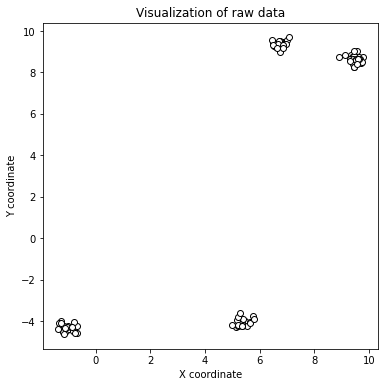

In [ ]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1],c='white', marker='o', edgecolor='black')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Visualization of raw data');
# Using scikit-learn to perform K-Means clustering
km = KMeans(n_clusters=4, init='random', max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_train)
# Get the cluster centroids
print(km.cluster_centers_)
print(y_km)

[3 0 1 2 2 1 3 0 2 2 2 0 0 2 3 0 0 0 3 1 1 0 3 2 0 3 2 2 0 3 3 3 2 0 1 2 3
 3 2 3 0 1 3 0 1 1 1 0 0 0 0 2 1 1 2 1 1 2 0 3 3 1 1 2 0 0 2 2 1 1 1 3 3 0
 0 1 1 3 0 3 2 2 3 1 2 2 2 0 0 1]


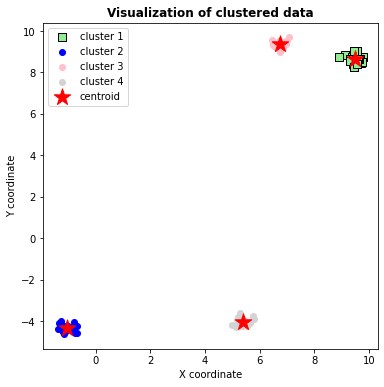

In [ ]:
# Get the cluster labels
print(km.labels_)
# Plotting the cluster centers and the data points on a 2D plane
centroids = km.cluster_centers_
ax = plt.subplots(figsize=(6, 6))

plt.scatter(X_train[y_km == 0, 0], X_train[y_km == 0, 1], s=50, c='lightgreen',
    marker='s', edgecolor='black', label='cluster 1')

plt.scatter(X_train[y_km == 1, 0], X_train[y_km == 1, 1],
            c='blue', label='cluster 2')

plt.scatter(X_train[y_km == 2, 0], X_train[y_km == 2, 1],
            c='pink', label='cluster 3')

plt.scatter(X_train[y_km == 3, 0], X_train[y_km == 3, 1],
            c='lightgray', label='cluster 4')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend(scatterpoints=1)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Visualization of clustered data', fontweight='bold')
plt.show()

Silhouetter Score: 0.914


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

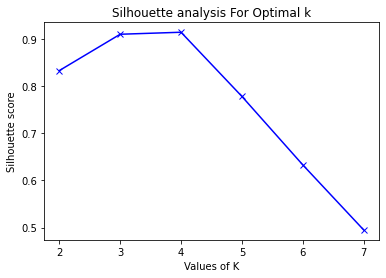

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
range_n_clusters = [2, 3, 4, 5, 6, 7]
silhouette_avg=[]

for num_clusters in range_n_clusters: 
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_train)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(X_train, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
! pip install yellowbrick


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

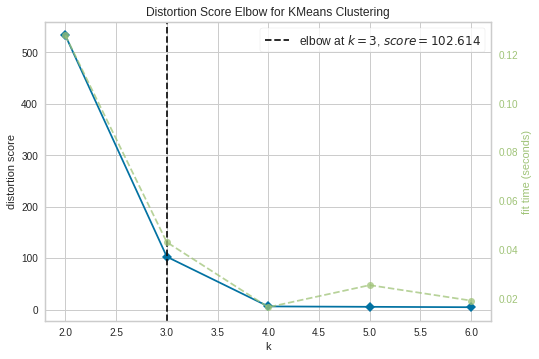

3
Accuracy:  0.0
Precision:  0.0
Recall:  0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
elb_visualizer = KElbowVisualizer(km, k=(2,7))
elb_visualizer.fit(X_train)    
elb_visualizer.show()
print(elb_visualizer.elbow_value_)
final_predictions = km.predict(X_test)
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, final_predictions))
print("Precision: ",metrics.precision_score(y_test, final_predictions, average='weighted'))
print("Recall: ",metrics.recall_score(y_test, final_predictions, average='weighted'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


[[ 2.66666667  3.        ]
 [ 5.5         6.        ]
 [12.         13.        ]]
[0 0 1 1 0 2]
Number of iterations  5
Prediction for (8,8) is  [1]
Prediction for (1,2) is  [0]
Prediction for (9,10) is  [2]


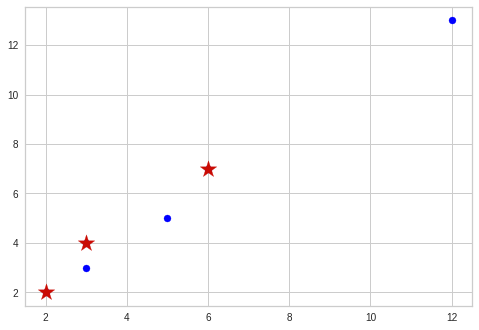

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1], label='points', c='blue')
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=300,
            c='r', label='centroid')
print("Number of iterations " , kmeans.n_iter_)
print("Prediction for (8,8) is ", kmeans.predict([[8,8]]))
print("Prediction for (1,2) is ", kmeans.predict([[1,2]]))
print("Prediction for (9,10) is ", kmeans.predict([[9,10]]))
plt.show()

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

digits = load_digits()
digits.data.shape
print(digits.keys())
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]


<ipython-input-9-2e827b1cd918>:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


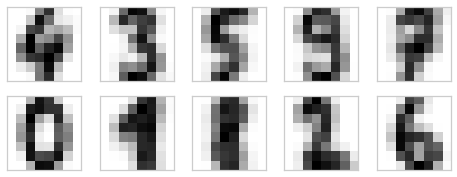

In [ ]:
from sklearn.cluster import KMeans
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
from scipy.stats import mode
labels = np.zeros_like(clusters)
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")

for i in range(10):
    mask = (clusters == i)
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951